<a href="INSERT_colab_python_link" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

label: exercise_1_a_vi

# Exercise 1 (a - vi): Soft Thresholding Operator
$$\theta^*_j =\begin{cases}
    \frac{\rho_j + \lambda}{z_j} & \text{ for } \rho_j < -\lambda\\
    0 & \text{ for }  -\lambda \leq \rho_j \leq \lambda\\
   \frac{\rho_j - \lambda}{z_j} & \text{ for } \rho_j > \lambda
\end{cases}$$

Plot $\theta^*_j$ as a function of $\rho_j$ for $\rho_j \in [-5, 5], \lambda = 1, z_j = 1.$ This function is called the soft thresholding operator.

In [20]:
#| label: soft_thresholding_plot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

rhos = np.arange(-5, 5, 0.1)
lambda_val = 1
z = 1

# Soft thresholding operator
thetas_star = np.where(rhos < -lambda_val, (rhos + lambda_val)/z,
                      np.where(rhos > lambda_val, (rhos - lambda_val)/z, 0))

# --------------------------------------------------------------------------- # 
# if the above code is hard to read for you, here is the equivalent with a loop
# (not recommended for performance, but clearer for understanding)
"""
thetas_star = np.zeros_like(rhos)
for i, rho in enumerate(rhos):
    if rho < -lambda_val:
        thetas_star[i] = (rho + lambda_val) / z
    elif rho > lambda_val:
        thetas_star[i] = (rho - lambda_val) / z
    else:
        thetas_star[i] = 0
"""
# --------------------------------------------------------------------------- # 

# OLS (no thresholding)
thetas = rhos/z

df = pd.concat([
    pd.DataFrame({'theta': thetas_star, 'type': 'Soft thresholding', 'rhos': rhos}),
    pd.DataFrame({'theta': thetas,      'type': 'OLS',               'rhos': rhos})
])

label: Plotting
Plotting

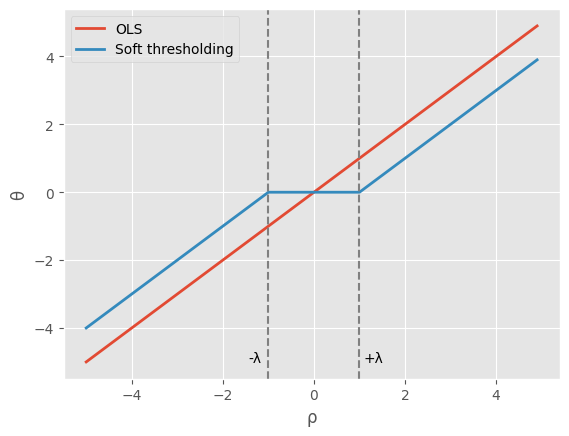

In [18]:
plt.style.use("ggplot")
for type_name in ['OLS', 'Soft thresholding']: # hardcoding to make colors match with R
    subset = df[df['type'] == type_name]
    plt.plot(subset['rhos'], subset['theta'], label=type_name, linewidth=2)

plt.axvline(x=-1, color='grey', linestyle='--')
plt.axvline(x=1, color='grey', linestyle='--')
plt.text(-1.3, df['theta'].min(), '-λ', ha='center')
plt.text(1.3, df['theta'].min(), '+λ', ha='center')

plt.xlabel('ρ')
plt.ylabel('θ')
plt.legend()
plt.grid(True)
plt.show()

label: soft_thresholding_plot_interpretation

## Interpretation of the Soft Thresholding Operator
As we can see from the plot the coefficient $\theta^*_j$ is equal to zero when $\rho_j$ is between $-\lambda$ and $\lambda$, and therefore performs feature selection.

label: lasso_vs_projected_exercise
# Exercise 1 (d): Lasso vs. Projected Lasso Comparison

You are given the code below to compare the quality of the projected Lasso regression vs. the regular Lasso regression.

Complete the missing code of the algorithms and interpret the result.

In [ ]:
#| label: lasso_vs_projected_exercise_code
import numpy as np
import pandas as pd
from scipy.linalg import eigh
import matplotlib.pyplot as plt

np.random.seed(509)

def proj_orth_lasso(X, y, lambda_val):
    """Projected Orthogonal Lasso"""
    # compute X_tilde
    X_tilde =  # TODO
    
    # compute analytical solution for X_tilde
    theta_star = # TODO
    return theta_star

def lasso(X, y, lambda_val, N):
    """Coordinate Descent Lasso"""
    p = X.shape[1]
    theta = np.ones(p)  # constant initialization
    
    for i in range(N):
        j = i % p  # cyclic coordinate selection
        
        rho_j = # TODO
        z_j = # TODO
        
        theta[j] = # TODO - Apply soft thresholding
    
    return theta

# ----------- No need to make changes in the code below -----------

# Bessel corrected Root Mean Square Error (RMSE)
corrected_rmses = pd.DataFrame(columns=['rmse', 'projected'])

p = 10   # Num coefficients  
n = 100  # Num samples

num_optim_steps = 400  # Coord updates for lasso

sigma_noise = 0.1
sigma_signal = 1.0

lambda_val = 1  # L1 penalty

num_reruns = 100  # Monte Carlo reruns

for i in range(num_reruns):
    X = np.random.normal(0, sigma_signal, (n, p))
    
    theta_true = np.random.normal(0, 1, p)
    # Randomly setting ~70% of coefficients to zero
    idx = np.random.binomial(1, 0.7, p)
    theta_true[idx == 1] = 0
    
    # Linear signal plus Gaussian noise
    y = X @ theta_true + np.random.normal(0, sigma_noise, n)
    
    theta_proj_lasso = proj_orth_lasso(X, y, lambda_val)
    theta_regular_lasso = lasso(X, y, lambda_val, num_optim_steps)
    
    corrected_rmse_proj    = n/(n-1) * np.std(theta_proj_lasso - theta_true)
    corrected_rmse_regular = n/(n-1) * np.std(theta_regular_lasso - theta_true)
    
    # Add results to DataFrame
    corrected_rmses = pd.concat([
        corrected_rmses,
        pd.DataFrame({'rmse': [corrected_rmse_proj], 'projected': ['yes']}),
        pd.DataFrame({'rmse': [corrected_rmse_regular], 'projected': ['no']})
    ], ignore_index=True)

# Create boxplot
data_yes = corrected_rmses[corrected_rmses['projected'] == 'yes']['rmse']
data_no = corrected_rmses[corrected_rmses['projected'] == 'no']['rmse']

plt.boxplot([data_yes, data_no], labels=['yes', 'no'])
plt.ylabel('RMSE')
plt.xlabel('Projected')
plt.title('Lasso vs Projected Lasso Comparison')
plt.grid(True, alpha=0.3)
plt.show()

label: lasso_vs_projected_solution
## Solution

In [24]:
#| label: installing_packages
# You'll need to install the following packages if you haven't done so already
# pip install numpy matplotlib pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

label: lasso_vs_projected_math_reminder

### Projected Orthogonal Lasso
Please refer to subexercises above for more details

Line 10 - Eigenvalue Decomposition: $\mathbf{X}^T \mathbf{X} = \mathbf{V} \mathbf{D} \mathbf{V}^T$

Line 13 - Transformation Matrix: $\mathbf{A} = \mathbf{V} \mathbf{D}^{-0.5}$

Line 14 - Transformed Design Matrix: $\tilde{\mathbf{X}} = \mathbf{X} \mathbf{A}$

Line 18 - OLS Solution in Projected Space : $\hat{\boldsymbol{\theta}}_{\text{OLS}} = \tilde{\mathbf{X}}^T \mathbf{y}$

Line 19-20 - Soft Thresholding in Projected Space: 
$$\hat{\boldsymbol{\theta}}_{\text{proj},j}^* = \begin{cases}
    \hat{\boldsymbol{\theta}}_{\text{OLS},j} - \lambda & \text{if } \hat{\boldsymbol{\theta}}_{\text{OLS},j} > \lambda \\
    0 & \text{if } |\hat{\boldsymbol{\theta}}_{\text{OLS},j}| \leq \lambda \\
    \hat{\boldsymbol{\theta}}_{\text{OLS},j} + \lambda & \text{if } \hat{\boldsymbol{\theta}}_{\text{OLS},j} < -\lambda
\end{cases}$$

Line 22 - Back-transformation to Original Space: $\boldsymbol{\theta}^* = \mathbf{A} \hat{\boldsymbol{\theta}}_{\text{proj}}^*$


In [29]:
#| label: lasso_vs_projected_solution_code_proj_orth
import numpy as np
np.random.seed(2)
import pandas as pd
import matplotlib.pyplot as plt

def proj_orth_lasso(X, y, lambda_val): # for a recap see subexercise b)
    # compute X_tilde
    # Decomposing X^T X = V D V^T (calculating eigenvalues and eigenvectors)
    eigenvals, eigenvecs = np.linalg.eigh(X.T @ X)
    
    # A = V D^{-0.5}; X_tilde = X A
    A = eigenvecs @ np.diag(eigenvals**(-0.5))
    X_tilde = X @ A
    
    # compute analytical solution for X_tilde
    proj_theta_ols = X_tilde.T @ y
    proj_theta_star = np.sign(proj_theta_ols) * np.where(np.abs(proj_theta_ols) > lambda_val,
                                                         np.abs(proj_theta_ols) - lambda_val,
                                                         0)
    
    theta_star = A @ proj_theta_star
    return theta_star

label: lasso_coordinate_descent_math_reminder

### Coordinate Descent Lasso 
Please refer to subexercises above for more details


Line 15 - Partial Residual: $r^{(j)} = \mathbf{y} - \mathbf{X}_{-j} \boldsymbol{\theta}_{-j}$

Line 16 - Residual Correlation: $\rho_j = \mathbf{X}_j^T r^{(j)} = \sum\limits_{i=1}^n X_{ij} \left( y_i - \sum\limits_{k \neq j} X_{ik} \theta_k \right)$

Line 17 - Feature Norm Squared: $z_j = \|\mathbf{X}_j\|_2^2 = \sum\limits_{i=1}^n X_{ij}^2$

From line 19 - Soft Thresholding Update:
$$\theta_j^{(t+1)} = \begin{cases}
    \frac{\rho_j + \lambda}{z_j} & \text{if } \rho_j < -\lambda \\
    0 & \text{if } |\rho_j| \leq \lambda \\
    \frac{\rho_j - \lambda}{z_j} & \text{if } \rho_j > \lambda
\end{cases}$$

Please note that we avoid additional sum loops by vectorization in the implementation

In [ ]:
#| label: lasso_vs_projected_solution_code_lasso
def lasso(X, y, lambda_val, N): 
    p = X.shape[1]
    theta = np.ones(p)  # constant initialization
    
    for i in range(N):
        # Pick coordinate j in a cyclic order: 0, 1, ..., p-1, 0, 1, ...
        j = i % p
        
        # We want to mask theta so that it's zero only for j-th coordinate
        # This way we compute the partial residual: y - X (without j) * theta (without j)
        mask = np.ones(p)
        mask[j] = 0.0
        
        partial_residual = y - X @ (theta * mask)
        rho_j = X[:, j] @ partial_residual
        z_j = np.sum(X[:, j]**2)
        
        if rho_j < -lambda_val:
            theta[j] = (rho_j + lambda_val) / z_j
        elif rho_j > lambda_val:
            theta[j] = (rho_j - lambda_val) / z_j
        else:
            theta[j] = 0
    
    return theta

#| label: comparion
## Comparison of Lasso and Projected Lasso
The code below was provided in the exercise for comparing the 2 approaches in true parameter identification

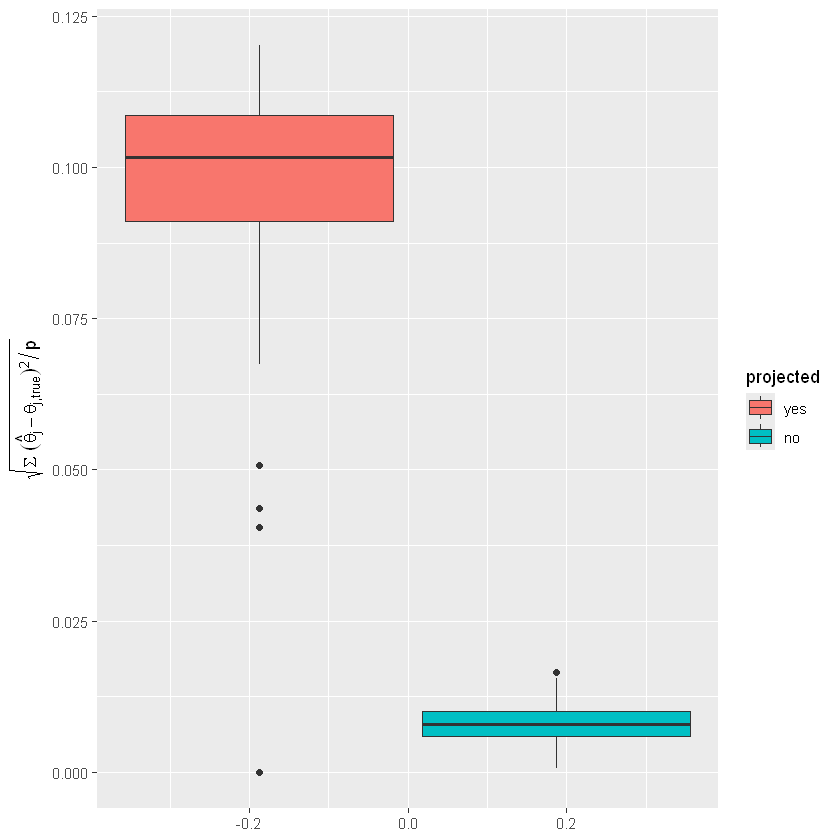

In [ ]:
#| label: lasso_vs_projected_solution_code_comparison

# Bessel corrected Root Mean Square Error (RMSE)
corrected_rmses = pd.DataFrame(columns=['corrected_rmse', 'projected'])

p = 10   # Num coefficients
n = 100  # Num samples

num_optim_steps = 400  # Coord updates for lasso

sigma_noise = 0.1
sigma_signal = 1.0

lambda_val = 1  # L1 penalty

num_reruns = 100  # Monte Carlo reruns

for i in range(num_reruns):
    X = np.random.normal(0, sigma_signal, (n, p))
    
    theta_true = np.random.normal(0, 1, p)
    # Randomly setting ~70% of coefficients to zero
    idx = np.random.binomial(1, 0.7, p)
    theta_true[idx == 1] = 0
    
    # Linear signal plus Gaussian noise
    y = X @ theta_true + np.random.normal(0, sigma_noise, n)
    
    theta_proj_lasso = proj_orth_lasso(X, y, lambda_val)
    theta_regular_lasso = lasso(X, y, lambda_val, num_optim_steps)
    
    corrected_rmse_proj = n/(n-1) * np.std(theta_proj_lasso - theta_true)
    corrected_rmse_regular = n/(n-1) * np.std(theta_regular_lasso - theta_true)
    
    # Add results to DataFrame
    corrected_rmses = pd.concat([
        corrected_rmses,
        pd.DataFrame({'corrected_rmse': [corrected_rmse_proj], 'projected': ['yes']}),
        pd.DataFrame({'corrected_rmse': [corrected_rmse_regular], 'projected': ['no']})
    ], ignore_index=True)

# Create boxplot using matplotlib
plt.figure(figsize=(10, 6))
data_yes = corrected_rmses[corrected_rmses['projected'] == 'yes']['corrected_rmse']
data_no = corrected_rmses[corrected_rmses['projected'] == 'no']['corrected_rmse']

box_data = [data_yes, data_no]
box_plot = plt.boxplot(box_data, labels=['yes', 'no'], patch_artist=True)

# Color the boxes
colors = ['lightblue', 'lightcoral']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

plt.ylabel('RMSE')
plt.xlabel('Projected')
plt.title('Lasso vs Projected Lasso: Parameter Recovery Performance')
plt.grid(True, alpha=0.3)
plt.show()

print(f"Mean RMSE - Projected Lasso: {data_yes.mean():.4f}")
print(f"Mean RMSE - Regular Lasso: {data_no.mean():.4f}")

label: lasso_vs_projected_interpretation
### Interpretation of Results

In this simulation, the true parameter vector is sparse in its original coordinate system. Hence, as expected, the regular Lasso regression outperforms the projected approach on average when identifying the true parameters in this scenario.